In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.xkcd()

In [3]:
df = pd.read_csv('./data.csv')
df['celkem'] = df['zeny'] + df["muzi"]
df['celkem_volici'] = df['zeny_volici'] + df['muzi_volici']
df['podil_volicu'] = df['celkem_volici'] / df['celkem']
df.head()

trida  rocnik  muzi  zeny  muzi_volici  zeny_volici   Tr    M   CJ Aj-1  \
0   5A8       1    14    17            6            3  Kom  Spa  Kom  Sol   
1   5B8       1    16    17           14            5   MH  Sle  Lan  Sol   
2   6A8       2    13    19            7           13  Spa  Spa   AK   Bi   
3   6B8       2    10    23            8            6  Sle  Sle   AK   SE   
4   7A8       3    19    12           12            8  Pos  Wei   EP   SE   

      ...        Fs   Zs IVTv IVT-1 IVT-2   Eh   Ev celkem celkem_volici  \
0     ...       NaN  NaN  NaN    DR   Hla  Tab  Stu     31             9   
1     ...       NaN  NaN  NaN   Hla    VK  Got  Stu     33            19   
2     ...       NaN  NaN  NaN   NaN   NaN  Tab  Stu     32            20   
3     ...       NaN  NaN  NaN   NaN   NaN  Tab  Stu     33            14   
4     ...       Mal  NaN  NaN   NaN   NaN  NaN  NaN     31            20   

  podil_volicu  
0     0.290323  
1     0.575758  
2     0.625000  
3     0.424242  
4     0.645161  

[5 rows x 37 columns]

In [4]:
SUBJECTS = ['Tr', 'M', 'CJ', 'Aj-1', 'Aj-2', 'ZSV', 'D', 'Z', 'Nj', 'Rj', 'Sj', 'Fj', 'Fy', 'Ch', 'Bi']

In [7]:
def sort_dict(d):
    sorted_keys = sorted(d, key=d.get, reverse=True)
    sorted_list = np.array([(k, d[k]) for k in sorted_keys])
    return pd.DataFrame({'name': sorted_list[:, 0], 'votes': sorted_list[:, 1]})

def plot_results(results, title="", ylabel="", xlabel="", save_path=""):
    fig, ax = plt.subplots(figsize=(16, 5))
    plt.tight_layout()
    
    results = sort_dict(results)
    
    x_pos = np.arange(len(results))
    ax.bar(x_pos, results['votes'])

    ax.set_xticks(x_pos)
    ax.set_xticklabels(results['name'])

    if title:
        ax.set_title(title)
    if ylabel:
        ax.set_ylabel(ylabel)
    if xlabel:
        ax.set_xlabel(xlabel)

    if save_path:
        plt.savefig(save_path, dpi=350)

    plt.show()

## One hour per class

In [36]:
def get_teachers(subjects):
    """Get teachers who teaches these subjects."""
    teachers = set(sum(df[subjects].values.tolist(), []))

    if None in teachers:
        teachers.remove(None)
    if (np.nan in teachers):
        teachers.remove(np.nan)

    return teachers

def get_class_teachers(class_, subjects):
    """Get teachers who teaches these subjects in given class."""
    teachers = set(sum(df[df['trida'] == class_][subjects].values.tolist(), []))

    if None in teachers:
        teachers.remove(None)
    if (np.nan in teachers):
        teachers.remove(np.nan)

    return teachers

def get_teacher_stats(teachers, subjects):
    teacher_stats = {t: {'volici': 0, 'celkem': 0} for t in teachers}

    for class_ in df['trida']:
        class_teachers = get_class_teachers(class_, subjects)
        for ct in class_teachers:
            teacher_stats[ct]['volici'] += df[df['trida'] == class_]['celkem_volici'].values[0]
            teacher_stats[ct]['celkem'] += df[df['trida'] == class_]['celkem'].values[0]

    return teacher_stats

def get_teacher_scores(teacher_stats):
    teacher_scores = {t: 0 for t in teacher_stats}
    for t in teacher_stats:
        teacher_scores[t] = teacher_stats[t]['volici'] / teacher_stats[t]['celkem']

    return teacher_scores

def analyze(subjects):
    teachers = get_teachers(subjects)
    teacher_stats = get_teacher_stats(teachers, subjects)
    teacher_scores = get_teacher_scores(teacher_stats)
    return teacher_scores

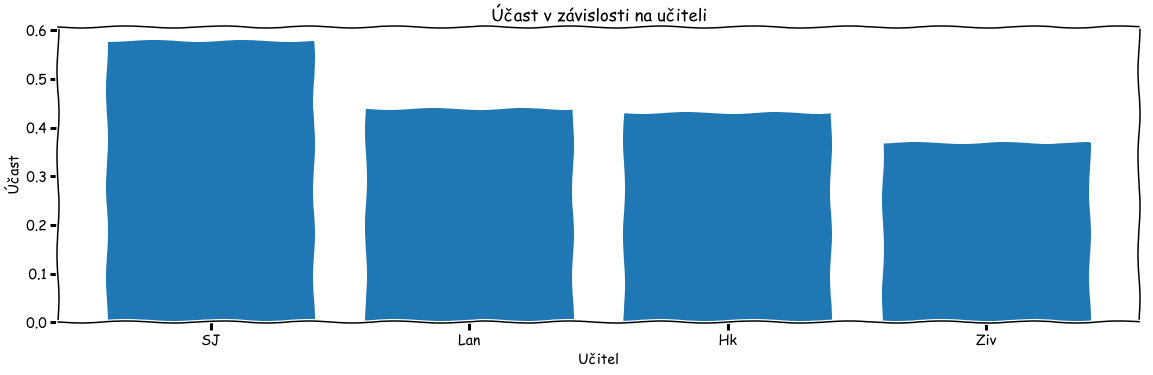

In [43]:
teacher_scores = analyze(['ZSV'])
plot_results(teacher_scores, title='Účast v závislosti na učiteli', ylabel='Účast', xlabel='Učitel')